# Introduction



L'objectif de ce projet est de réaliser une analyse approfondie des données historiques sur une large sélection d'actifs financiers, collectées sur une période de cinq ans. Ces actifs, provenant de différents secteurs et types d'investissements, incluent des actions, des obligations, des matières premières, des devises et des instruments financiers dérivés. L'objectif est d'étudier leur performance, leur volatilité, ainsi que les tendances et relations qui peuvent exister entre ces différents types d'actifs sur le long terme.

**Objectifs**

Les principaux objectifs de ce projet sont les suivants :
1. **Analyser la performance** des actifs sur une période de cinq ans, en observant les variations annuelles, la performance cumulée, et en comparant ces données entre différents actifs.
2. **Évaluer la volatilité** de ces actifs, afin de comprendre les fluctuations de prix et les risques associés à chaque type d'actif.
3. **Identifier des corrélations** entre différents actifs afin d'aider à la construction de portefeuilles diversifiés et optimiser la gestion des risques.
4. **Visualiser les résultats** sous forme de graphiques interactifs, permettant une meilleure compréhension des tendances et des relations entre les actifs.

**Données**

Les données utilisées dans ce projet ont été collectées auprès de différentes sources fiables disponibles en ligne. Elles couvrent une période de cinq ans, incluant des informations quotidiennes, hebdomadaires et mensuelles sur les prix, les rendements, les variations, ainsi que la volatilité de chaque actif. Ces données seront analysées en utilisant des techniques statistiques et des outils de visualisation pour produire des insights pertinents.

**Méthodologie**

Pour réaliser cette analyse, plusieurs étapes sont nécessaires, notamment la préparation et le nettoyage des données, le calcul des métriques financières clés (performance, volatilité, etc.), ainsi que la création de visualisations dynamiques pour illustrer les résultats. Les outils utilisés incluent Python, avec des bibliothèques telles que pandas pour la manipulation des données, matplotlib et plotly pour la visualisation des résultats.


# Importation des Bibliothèques

Avant de commencer l'analyse des données, plusieurs bibliothèques doivent être importées pour faciliter le traitement des données, la visualisation, et l'interactivité dans le projet.

1. **Installation des dépendances** :  
   Les premières lignes de code installent les bibliothèques nécessaires via `pip` :
   - `!pip install dash` installe Dash, un framework Python permettant de créer des applications web interactives.
   - `!pip install ipywidgets==7.7.1` installe la version spécifique des widgets interactifs pour Jupyter.
   - `!jupyter nbextension enable --py widgetsnbextension` active l'extension nécessaire pour que les widgets fonctionnent dans Jupyter Notebook.
   - `output.enable_custom_widget_manager()` active la gestion des widgets personnalisés dans l'environnement de développement.

2. **Importation des bibliothèques** :
   Ensuite, plusieurs bibliothèques sont importées pour manipuler et visualiser les données :
   - `import pandas as pd` et `import numpy as np` sont des bibliothèques essentielles pour la manipulation des données, telles que les DataFrames et les tableaux multidimensionnels.
   - `import os` est utilisé pour interagir avec le système de fichiers, par exemple, pour lire ou enregistrer des fichiers.
   - `import seaborn as sns` permet de créer des visualisations statistiques avancées et des graphiques.
   - `import warnings` sert à gérer les avertissements et les messages d'erreur. Dans ce cas, il est utilisé pour ignorer les avertissements de type `FutureWarning`, afin de ne pas encombrer la sortie avec des messages inutiles.
   - `from IPython.display import display` permet d'afficher les éléments dans un notebook IPython, utile pour visualiser les résultats interactifs.
   - `import dash` et `from dash import dcc, html` importent le framework Dash et ses composants pour construire des interfaces utilisateur interactives.
   - `from dash.dependencies import Input, Output` est utilisé pour lier les interactions entre les éléments de l'interface et les fonctions de calcul.
   - `import plotly.express as px` est utilisé pour générer des graphiques interactifs avec Plotly.
   - `from google.colab import output` et `from ipywidgets import interact, Dropdown, IntSlider` sont utilisés pour créer des widgets interactifs dans un environnement Jupyter Notebook ou Google Colab.

3. **Gestion des avertissements** :  
   Finalement, la commande `warnings.filterwarnings("ignore", category=FutureWarning)` désactive l'affichage des avertissements liés aux futures versions de certaines bibliothèques Python, ce qui permet de garder l'environnement de travail plus propre.



In [ ]:
!pip install dash
!pip install ipywidgets==7.7.1
!jupyter nbextension enable --py widgetsnbextension
output.enable_custom_widget_manager()
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
from IPython.display import display
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from google.colab import output
from ipywidgets import interact, Dropdown, IntSlider

# Désactiver les avertissements de type FutureWarning au début du projet
warnings.filterwarnings("ignore", category=FutureWarning)


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


# Fonction de traitement

**Fonction** : `process_financial_datasets`

Cette fonction a pour objectif de parcourir un dossier contenant des fichiers CSV représentant des données financières, de les traiter pour les rendre exploitables, et de combiner les données traitées dans un unique DataFrame.

**Étapes principales :**

1. **Parcours des fichiers CSV :**  
   - Chaque fichier du dossier dont le nom se termine par `.csv` est lu et analysé.

2. **Nettoyage et transformation des données :**  
   - **Colonnes inutiles :** Suppression de la colonne `Ouv.` si elle existe.  
   - **Renommage des colonnes :** Les colonnes sont standardisées pour éviter les espaces ou incohérences.  
   - **Colonnes numériques :** Les colonnes telles que `Dernier`, `Plus haut`, `Plus bas` sont nettoyées des séparateurs incorrects (espaces, points, virgules) et converties en format numérique.  
   - **Volume :** Les volumes contenant des suffixes (`M` pour millions, `K` pour milliers) sont convertis en nombres.  
   - **Variation :** La colonne `Variation %` est transformée en une nouvelle colonne `Variation` avec des valeurs décimales (par exemple, 10% devient 0.10).  
   - **Date :** La colonne `Date` est convertie en format datetime pour une manipulation facile.  

3. **Ajout d'une colonne `actif` :**  
   - Une colonne est ajoutée pour indiquer le nom de l'actif, dérivé du nom du fichier CSV (sans l'extension).

4. **Gestion des erreurs :**  
   - Si un fichier pose problème lors de son traitement, un message d’erreur est affiché sans interrompre l’analyse des autres fichiers.

5. **Combinaison des données :**  
   - Une fois tous les fichiers traités, les données sont combinées dans un unique DataFrame.

6. **Résultat :**  
   - Si des fichiers valides ont été trouvés, le DataFrame combiné est retourné. Sinon, un DataFrame vide est renvoyé.


In [ ]:
def process_financial_datasets(folder_path):
    """
    Parcourt tous les fichiers CSV dans un dossier, traite les données et les combine dans un DataFrame.

    - Supprime la colonne 'Ouv.'.
    - Convertit les volumes avec 'M' en millions et 'K' en milliers.
    - Nettoie et renomme les colonnes pour standardiser les noms.
    - Corrige les colonnes numériques avec des mauvais séparateurs de milliers ou décimaux.
    - Transforme la colonne 'Variation %' en 'Variation' sans pourcentage.

    Args:
        folder_path (str): Chemin vers le dossier contenant les fichiers CSV.

    Returns:
        pd.DataFrame: Un DataFrame combiné avec les données traitées pour chaque actif.
    """
    all_data = []

    # Fonction pour convertir les volumes avec 'M' ou 'K' en valeurs numériques
    def convert_volume(volume):
        if isinstance(volume, str):  # Vérifier si c'est une chaîne de caractères
            volume = volume.upper().replace(',', '')  # Enlever les virgules et passer en majuscule
            if 'M' in volume:
                return float(volume.replace('M', '')) * 1_000_000  # Convertir en millions
            elif 'K' in volume:
                return float(volume.replace('K', '')) * 1_000  # Convertir en milliers
        try:
            return float(volume)  # Si c'est déjà un nombre, on le retourne tel quel
        except ValueError:
            return 0  # Si la conversion échoue, retourner 0

    # Fonction pour corriger les colonnes numériques avec des mauvais séparateurs
    def clean_numeric_column(column):
        return column.str.replace(' ', '').str.replace('.', '').str.replace(',', '.').astype(float)

    # Parcourir tous les fichiers CSV dans le dossier
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            try:
                # Lire le fichier CSV
                data = pd.read_csv(file_path)

                # Supprimer les espaces inutiles dans les noms des colonnes
                data.columns = data.columns.str.strip()

                # Renommer les colonnes pour corriger les problèmes d'espace
                column_mapping = {
                    " Plus haut": "Plus haut",
                    " Plus bas": "Plus bas",
                    " Ouv.": "Ouv.",
                    " Dernier": "Dernier",
                    " Vol.": "Vol.",
                    " Variation %": "Variation"
                }
                data.rename(columns=column_mapping, inplace=True)

                # Supprimer la colonne 'Ouv.' si elle existe
                if 'Ouv.' in data.columns:
                    data = data.drop(columns=['Ouv.'])

                # Corriger les colonnes numériques
                numeric_columns = ['Dernier', 'Plus Haut', 'Plus Bas']
                for col in numeric_columns:
                    if col in data.columns:
                        data[col] = clean_numeric_column(data[col])

                # Convertir les volumes dans la colonne 'Vol.'
                if 'Vol.' in data.columns:
                    data['Vol.'] = data['Vol.'].apply(convert_volume)

                if 'Variation %' in data.columns:
                    # Créer une nouvelle colonne 'Variation' à partir de 'Variation %'
                    data['Variation'] = data['Variation %'].str.replace('%', '').str.replace(',', '.').astype(float) / 100
                    # Supprimer la colonne 'Variation %'
                    data.drop(columns=['Variation %'], inplace=True)

                # Convertir la colonne 'Date' au format datetime avec le format correct
                if 'Date' in data.columns:
                    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Format correct

                # Ajouter une colonne 'actif' pour identifier le fichier d'origine
                actif_name = os.path.splitext(file_name)[0]  # Nom du fichier sans extension
                data['actif'] = actif_name

                # Ajouter les données traitées à la liste
                all_data.append(data)

            except Exception as e:
                print(f"Erreur lors du traitement de {file_name}: {e}")

    # Vérifier si des données ont été ajoutées
    if all_data:
        # Combiner toutes les données dans un seul DataFrame
        combined_data = pd.concat(all_data, ignore_index=True)
        return combined_data
    else:
        print("Aucun fichier CSV valide trouvé dans le dossier.")
        return pd.DataFrame()  # Retourne un DataFrame vide si aucune donnée


# Connexion aux datasets

La connexion au dataset est essentielle pour accéder aux données sources nécessaires à l'analyse. Ce code permet de charger, traiter et combiner automatiquement les fichiers CSV d'un dossier.

1. **Définir le chemin :**
   - `folder_path` pointe vers le dossier contenant les fichiers CSV.

2. **Traiter les données :**
   - `process_financial_datasets(folder_path)` charge et nettoie les fichiers CSV pour créer un DataFrame combiné (`combined_df`).

3. **Aperçu des données :**
   - `print(combined_df.columns)` affiche les noms des colonnes pour vérifier leur structure.
   - `print(combined_df.head())` montre les premières lignes pour un aperçu rapide des données traitées.

Ce code assure que les données brutes sont prêtes pour l'analyse.

In [ ]:
folder_path = "/content/drive/MyDrive/projet python finance/data asset"
combined_df = process_financial_datasets(folder_path)

# Afficher un aperçu des données combinées
print(combined_df.columns)

print(combined_df.head())


Index(['Date', 'Dernier', 'Plus Haut', 'Plus Bas', 'Vol.', 'Variation',
       'actif'],
      dtype='object')
        Date  Dernier  Plus Haut  Plus Bas          Vol.  Variation   actif
0 2024-11-28  7182.43    7207.07   7143.00  1.045000e+09     0.0055  CAC 40
1 2024-11-27  7143.03    7156.42   7091.15  7.702000e+09    -0.0072  CAC 40
2 2024-11-26  7194.51    7256.78   7185.49  6.877000e+09    -0.0087  CAC 40
3 2024-11-25  7257.47    7333.23   7239.38  1.229600e+10     0.0003  CAC 40
4 2024-11-22  7255.01    7271.06   7156.23  7.196000e+09     0.0058  CAC 40


# Vérification des valeurs manquantes

Vérifier les valeurs manquantes dans un dataset est crucial pour garantir l'exactitude et la qualité des analyses. Les valeurs manquantes ou vides peuvent entraîner des biais ou des erreurs si elles ne sont pas gérées correctement.

Explication rapide du code :
**texte en gras**
1. **Identifier les valeurs manquantes et vides :**
   - La fonction `check_missing_values_in_df(df)` calcule le nombre de valeurs nulles (`isnull()`) et vides (`== ''`) dans chaque colonne.
   - Elle crée un rapport (`report`) avec :
     - `valeurs_nulles` : le nombre de valeurs `NaN`.
     - `valeurs_vides` : le nombre de chaînes vides.
     - `total_manquant` : la somme des deux.

2. **Styliser les rapports :**
   - `style_missing_values(val)` applique une couleur de fond :
     - **Vert** pour les colonnes sans valeurs manquantes.
     - **Rouge** pour celles ayant des valeurs manquantes.
   - Le style est appliqué avec `display_missing_values_report()`.

3. **Afficher les résultats globaux :**
   - `check_missing_values_global(df)` affiche un rapport détaillé des valeurs manquantes et vides pour tout le DataFrame.

**Importance de cette étape :**
- **Fiabilité des analyses :** Les colonnes contenant des valeurs manquantes peuvent introduire des erreurs dans les calculs et biais dans les modèles.
- **Plan d’action :** Le rapport permet d’identifier les colonnes problématiques pour envisager des solutions, comme :
  - Remplir (`fillna`) les valeurs manquantes.
  - Supprimer (`dropna`) les colonnes ou lignes incomplètes.


In [ ]:
import pandas as pd
from IPython.display import display

def style_missing_values(val):
    """
    Applique un style aux valeurs nulles et vides.
    - Vert pour 0 (valeurs nulles et vides).
    - Rouge pour les autres valeurs.
    """
    color = 'green' if val == 0 else 'red'
    return f'background-color: {color}'

def display_missing_values_report(report):
    """
    Applique un style de couleur aux colonnes 'valeurs_nulles' et 'valeurs_vides' du DataFrame.
    Utilise 'map' au lieu de 'applymap' pour éviter les warnings.
    """
    # Appliquer le style avec 'map' sur les colonnes spécifiques
    return report.style.apply(lambda x: x.map(style_missing_values), subset=['valeurs_nulles', 'valeurs_vides'])

def check_missing_values_in_df(df):
    """
    Vérifie les valeurs manquantes et vides dans un DataFrame et crée un rapport.

    Args:
        df (pd.DataFrame): Le DataFrame à analyser.

    Returns:
        pd.DataFrame: Un DataFrame contenant les valeurs nulles et vides pour chaque colonne.
    """
    missing_values = df.isnull().sum()  # Calculer les valeurs manquantes
    empty_values = (df == '').sum()  # Calculer les valeurs vides (chaînes vides)

    # Créer un rapport avec les valeurs manquantes et vides
    report = pd.DataFrame({
        'valeurs_nulles': missing_values,
        'valeurs_vides': empty_values
    })

    # Calculer la somme des deux pour chaque colonne
    report['total_manquant'] = report['valeurs_nulles'] + report['valeurs_vides']

    return report

def check_missing_values_global(df):
    """
    Vérifie les valeurs manquantes et nulles globalement dans un DataFrame
    et affiche un rapport global pour l'ensemble du dataset.

    Args:
        df (pd.DataFrame): Le DataFrame à analyser.

    Returns:
        None
    """
    # Vérifier les valeurs manquantes et vides globalement
    missing_values_report = check_missing_values_in_df(df)

    # Afficher le rapport global
    display(display_missing_values_report(missing_values_report))


In [ ]:
check_missing_values_global(combined_df)


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,12091,0,12091
Variation,0,0,0
actif,0,0,0


Les valeurs manquantes sont toutes du aux manque d'information du volume, nous allons vérifier cela pour chaque actif

In [ ]:
import pandas as pd
from IPython.display import display

def style_missing_values(val):
    """
    Applique un style aux valeurs nulles et vides.
    - Vert pour 0 (valeurs nulles et vides).
    - Rouge pour les autres valeurs.
    """
    color = 'green' if val == 0 else 'red'
    return f'background-color: {color}'

def display_missing_values_report(report):
    """
    Applique un style de couleur aux colonnes 'valeurs_nulles' et 'valeurs_vides' du DataFrame.
    Utilise 'map' au lieu de 'applymap' pour éviter les warnings.
    """
    # Appliquer le style avec 'map' sur les colonnes spécifiques
    return report.style.apply(lambda x: x.map(style_missing_values), subset=['valeurs_nulles', 'valeurs_vides'])

def check_missing_values_in_df(df):
    """
    Vérifie les valeurs manquantes et vides dans un DataFrame et crée un rapport.

    Args:
        df (pd.DataFrame): Le DataFrame à analyser.

    Returns:
        pd.DataFrame: Un DataFrame contenant les valeurs nulles et vides pour chaque colonne.
    """
    missing_values = df.isnull().sum()  # Calculer les valeurs manquantes
    empty_values = (df == '').sum()  # Calculer les valeurs vides (chaînes vides)

    # Créer un rapport avec les valeurs manquantes et vides
    report = pd.DataFrame({
        'valeurs_nulles': missing_values,
        'valeurs_vides': empty_values
    })

    # Calculer la somme des deux pour chaque colonne
    report['total_manquant'] = report['valeurs_nulles'] + report['valeurs_vides']

    return report

def check_missing_values_by_actif(df):
    """
    Vérifie les valeurs manquantes et nulles pour chaque actif dans un DataFrame
    et affiche le rapport pour chaque actif.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données de tous les actifs.

    Returns:
        None
    """
    # Regrouper par actif
    actifs = df['actif'].unique()  # Liste des actifs uniques

    # Appliquer la vérification des valeurs manquantes pour chaque actif
    for actif in actifs:
        print(f"\n\n### Actif: {actif} ###")

        # Filtrer les données pour cet actif
        actif_data = df[df['actif'] == actif]

        # Vérifier les valeurs manquantes et vides
        missing_values_report = check_missing_values_in_df(actif_data)

        # Afficher le rapport pour cet actif
        display(display_missing_values_report(missing_values_report))



In [ ]:
check_missing_values_by_actif(combined_df)




### Actif: CAC 40 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: CSI 1000 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: DAX ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,4,0,4
Variation,0,0,0
actif,0,0,0




### Actif: FBTC ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: IBIT ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: IWM ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,31,0,31
Variation,0,0,0
actif,0,0,0




### Actif: SPY ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,5,0,5
Variation,0,0,0
actif,0,0,0




### Actif: SQQQ ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: THCX ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,30,0,30
Variation,0,0,0
actif,0,0,0




### Actif: Dow Jones ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: EUR_USD ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1804,0,1804
Variation,0,0,0
actif,0,0,0




### Actif: Eurex Swiss CHF Government Bond Future ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,44,0,44
Variation,0,0,0
actif,0,0,0




### Actif: Euro Stoxx 50 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,8,0,8
Variation,0,0,0
actif,0,0,0




### Actif: FRGV5YUSAC=R ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1803,0,1803
Variation,0,0,0
actif,0,0,0




### Actif: FTSE China 50 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1716,0,1716
Variation,0,0,0
actif,0,0,0




### Actif: Futures argent ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,29,0,29
Variation,0,0,0
actif,0,0,0




### Actif: Futures avoine ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,20,0,20
Variation,0,0,0
actif,0,0,0




### Actif: Futures blé US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,42,0,42
Variation,0,0,0
actif,0,0,0




### Actif: Futures bois de construction ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,63,0,63
Variation,0,0,0
actif,0,0,0




### Actif: Futures cacao US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,40,0,40
Variation,0,0,0
actif,0,0,0




### Actif: Futures café robusta Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,73,0,73
Variation,0,0,0
actif,0,0,0




### Actif: Futures coton US #2 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,7,0,7
Variation,0,0,0
actif,0,0,0




### Actif: Futures cuivre ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,81,0,81
Variation,0,0,0
actif,0,0,0




### Actif: Futures émissions de carbone ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,7,0,7
Variation,0,0,0
actif,0,0,0




### Actif: Futures Euro Bund ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,9,0,9
Variation,0,0,0
actif,0,0,0




### Actif: Futures Euro OAT ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,8,0,8
Variation,0,0,0
actif,0,0,0




### Actif: Futures fioul ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,81,0,81
Variation,0,0,0
actif,0,0,0




### Actif: Futures gasoil Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,2,0,2
Variation,0,0,0
actif,0,0,0




### Actif: Futures gaz naturel ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,83,0,83
Variation,0,0,0
actif,0,0,0




### Actif: Futures Gilt Royaume-Uni ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,113,0,113
Variation,0,0,0
actif,0,0,0




### Actif: Futures Japon JGB ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,236,0,236
Variation,0,0,0
actif,0,0,0




### Actif: Futures or ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,3,0,3
Variation,0,0,0
actif,0,0,0




### Actif: Futures pétrole brut WTI ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,83,0,83
Variation,0,0,0
actif,0,0,0




### Actif: Futures soja US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,36,0,36
Variation,0,0,0
actif,0,0,0




### Actif: Futures sucre Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,2,0,2
Variation,0,0,0
actif,0,0,0




### Actif: Futures T-Note US à 5 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,166,0,166
Variation,0,0,0
actif,0,0,0




### Actif: Euribor c2 Futures ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,7,0,7
Variation,0,0,0
actif,0,0,0




### Actif: Futures T-Note US à 30 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,100,0,100
Variation,0,0,0
actif,0,0,0




### Actif: LVMH ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1,0,1
Variation,0,0,0
actif,0,0,0




### Actif: NASDAQ Composite ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: Nikkei 225 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,2,0,2
Variation,0,0,0
actif,0,0,0




### Actif: Rendement de l'Obligation États-Unis 10 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1799,0,1799
Variation,0,0,0
actif,0,0,0




### Actif: S&P 500 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1731,0,1731
Variation,0,0,0
actif,0,0,0




### Actif: Shanghai Composite ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: Solana ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,398,0,398
Variation,0,0,0
actif,0,0,0




### Actif: USGV5YUSAB=R ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,1424,0,1424
Variation,0,0,0
actif,0,0,0




### Actif: Action-AAPL ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: Cryptomonnaie-Bitcoin ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0




### Actif: Cryptomonnaie-Ethereum ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0


L'intérêt de remplir les valeurs nulles est d'assurer la **cohérence et la qualité des données**. Cela permet :

1. **D'éviter des erreurs** dans les analyses ou les modèles, car les valeurs manquantes peuvent causer des échecs de calcul.
2. **D'améliorer la précision** des résultats en remplaçant les données manquantes par des valeurs adaptées (moyenne, médiane, etc.).
3. **De préserver la taille du dataset**, en évitant de supprimer des lignes ou colonnes importantes.
4. **De garantir une interprétation correcte**, surtout dans les visualisations ou tableaux récapitulatifs.

C'est une étape essentielle pour tirer des conclusions fiables à partir des données.

In [ ]:
# Remplir les valeurs manquantes par 0 dans le DataFrame
fill_combined_df = combined_df.fillna(0)

# Appeler la fonction d'affichage global pour vérifier les valeurs manquantes
check_missing_values_global(fill_combined_df)


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0


Plus aucune valeur null ou vide, car elles ont été comblé par des 0

# Fonction de traitement/ ajout de nouveaux indicateurs

Dans le cadre de notre projet, nous avons développé une fonction clé, `add_technical_indicators`, qui enrichit nos données en y intégrant des indicateurs techniques essentiels à l’analyse financière. Cette fonction commence par s’assurer que les données brutes, comme les colonnes "Dernier", "Plus Haut", "Plus Bas" et "Vol.", sont correctement formatées en valeurs numériques. Ensuite, pour chaque actif, elle calcule des indicateurs tels que les moyennes mobiles sur 10 et 50 jours, qui permettent d’identifier les tendances à court et moyen terme, la volatilité sur 10 jours pour mesurer les risques, le range journalier pour évaluer les fluctuations, le momentum qui reflète la dynamique des prix, ainsi que le volume cumulé pour suivre l’évolution des échanges. Ces calculs sont réalisés après un tri par date afin de garantir leur exactitude.

L’intérêt de cette fonction dans notre projet est multiple. Elle permet une analyse approfondie des actifs pour mieux comprendre leur comportement, identifier les opportunités et gérer les risques. De plus, en automatisant le calcul de ces indicateurs pour tous les actifs de manière cohérente, elle standardise nos données et facilite leur interprétation. Enfin, ces métriques sont essentielles pour préparer des analyses avancées ou des visualisations et jouent un rôle central dans la prise de décision financière éclairée, en rendant nos données plus exploitables et pertinentes.


**Indicateurs ajoutés :**
1. **Moyenne mobile (10 et 50 jours)** :
   - **`moyenne_mobile_10`** : Moyenne des prix de clôture sur 10 jours.
   - **`moyenne_mobile_50`** : Moyenne des prix de clôture sur 50 jours.
   - **Utilité** : Permet d’identifier les tendances à court et moyen terme et de détecter les croisements ("golden cross" ou "death cross").

2. **Volatilité sur 10 jours** :
   - **`volatilité_10`** : Écart type des prix de clôture sur 10 jours.
   - **Utilité** : Mesure la variabilité des prix. Une volatilité élevée peut indiquer un risque ou des opportunités de trading accrues.

3. **Range journalier** :
   - **`range_journalier`** : Différence entre le prix le plus haut et le plus bas de la journée.
   - **Utilité** : Indique la fourchette des fluctuations journalières, utile pour évaluer l'amplitude des mouvements d'un actif.

4. **Momentum** :
   - **`momentum`** : Variation du prix de clôture par rapport à la veille.
   - **Utilité** : Mesure la vitesse et la force de la tendance. Un momentum positif indique une pression acheteuse, et négatif une pression vendeuse.

5. **Volume cumulé** :
   - **`volume_cumule`** : Somme cumulative des volumes échangés.
   - **Utilité** : Fournit une mesure de l'intérêt du marché pour l’actif au fil du temps.

Importance globale de ce code :
- **Analyse approfondie** : Ces indicateurs aident à mieux comprendre la dynamique des actifs (tendances, risques, opportunités).
- **Prise de décision** : Les traders et analystes utilisent ces métriques pour élaborer des stratégies d’investissement ou de trading.
- **Comparabilité** : Les indicateurs permettent de standardiser l'analyse entre différents actifs.
- **Automatisation** : Calculer ces indicateurs pour tous les actifs et les combiner en un seul DataFrame facilite le traitement en aval, comme les visualisations ou les modèles prédictifs.


In [ ]:
def add_technical_indicators(df):
    """
    Ajoute des indicateurs techniques pour chaque actif dans le DataFrame donné.

    Args:
        df (pd.DataFrame): DataFrame contenant les colonnes nécessaires pour calculer les indicateurs.

    Returns:
        pd.DataFrame: DataFrame enrichi avec les nouvelles colonnes d'indicateurs techniques.
    """
    # Colonnes à nettoyer pour s'assurer qu'elles sont numériques
    numeric_cols = ['Dernier', 'Plus Haut', 'Plus Bas', 'Vol.']
    for col in numeric_cols:
        if col in df.columns:
            # Convertir en chaîne pour appliquer les méthodes de nettoyage, si nécessaire
            df[col] = df[col].astype(str).str.replace(',', '').str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Liste pour collecter les DataFrames enrichis pour chaque actif
    enriched_dfs = []

    for actif in df['actif'].unique():
        # Filtrer le DataFrame pour chaque actif
        actif_df = df[df['actif'] == actif].copy()

        # Trier par date pour garantir un calcul correct
        actif_df = actif_df.sort_values(by='Date')

        # Calcul des indicateurs techniques
        actif_df['moyenne_mobile_10'] = actif_df['Dernier'].rolling(window=10).mean()
        actif_df['moyenne_mobile_50'] = actif_df['Dernier'].rolling(window=50).mean()
        actif_df['volatilité_10'] = actif_df['Dernier'].rolling(window=10).std()
        actif_df['range_journalier'] = actif_df['Plus Haut'] - actif_df['Plus Bas']
        actif_df['momentum'] = actif_df['Dernier'].diff()
        actif_df['volume_cumule'] = actif_df['Vol.'].cumsum()

        # Ajouter le DataFrame enrichi à la liste
        enriched_dfs.append(actif_df)

    # Combiner tous les DataFrames enrichis
    enriched_df = pd.concat(enriched_dfs, ignore_index=True)

    return enriched_df


In [ ]:
# Appliquer les indicateurs techniques pour chaque actif
fill_combined_df_with_indicators = add_technical_indicators(fill_combined_df)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes
fill_combined_df_with_indicators.head()


,Date,Dernier,Plus Haut,Plus Bas,Vol.,Variation,actif,moyenne_mobile_10,moyenne_mobile_50,volatilité_10,range_journalier,momentum,volume_cumule
0,2018-01-02,5288.60,5318.74,5258.66,6.887000e+09,-0.0045,CAC 40,NaN,NaN,NaN,60.08,NaN,6.887000e+09
1,2018-01-03,5331.28,5347.63,5291.89,7.770000e+09,0.0081,CAC 40,NaN,NaN,NaN,55.74,42.68,1.465700e+10
2,2018-01-04,5413.69,5430.72,5360.01,9.545000e+09,0.0155,CAC 40,NaN,NaN,NaN,70.71,82.41,2.420200e+10
3,2018-01-05,5470.75,5470.75,5422.78,7.863000e+09,0.0105,CAC 40,NaN,NaN,NaN,47.97,57.06,3.206500e+10
4,2018-01-08,5487.42,5499.15,5478.92,7.455000e+09,0.0030,CAC 40,NaN,NaN,NaN,20.23,16.67,3.952000e+10


Vérification des valeurs vide et manquantes suite à l'ajout de nouveaux indicateurs

In [ ]:
check_missing_values_by_actif(fill_combined_df_with_indicators)




### Actif: CAC 40 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: CSI 1000 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: DAX ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: FBTC ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: IBIT ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: IWM ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: SPY ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: SQQQ ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: THCX ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Dow Jones ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: EUR_USD ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Eurex Swiss CHF Government Bond Future ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Euro Stoxx 50 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: FRGV5YUSAC=R ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: FTSE China 50 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures argent ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures avoine ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures blé US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures bois de construction ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures cacao US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures café robusta Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures coton US #2 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures cuivre ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures émissions de carbone ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures Euro Bund ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures Euro OAT ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures fioul ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures gasoil Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures gaz naturel ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures Gilt Royaume-Uni ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures Japon JGB ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures or ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures pétrole brut WTI ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures soja US ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures sucre Londres ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures T-Note US à 5 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Euribor c2 Futures ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Futures T-Note US à 30 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: LVMH ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: NASDAQ Composite ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Nikkei 225 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Rendement de l'Obligation États-Unis 10 ans ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: S&P 500 ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Shanghai Composite ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Solana ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: USGV5YUSAB=R ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Action-AAPL ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Cryptomonnaie-Bitcoin ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9




### Actif: Cryptomonnaie-Ethereum ###


,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,9,0,9
moyenne_mobile_50,49,0,49
volatilité_10,9,0,9


In [ ]:
check_missing_values_global(fill_combined_df_with_indicators)

,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,441,0,441
moyenne_mobile_50,2401,0,2401
volatilité_10,441,0,441


Dans ce passage, nous gérons les valeurs manquantes dans le DataFrame contenant les données enrichies avec des indicateurs techniques. La méthode `fillna(method='ffill')` remplit les valeurs manquantes en propageant les données valides précédentes, tandis que `fillna(method='bfill')` utilise les données valides suivantes pour combler les manques restants. Cette double approche garantit une continuité dans les séries temporelles, ce qui est essentiel pour éviter des perturbations dans les calculs d'indicateurs ou d'analyses. Enfin, nous vérifions à nouveau les valeurs manquantes avec la fonction `check_missing_values_global` pour nous assurer que le DataFrame est complet et prêt pour les analyses ultérieures. Cette étape améliore la qualité des données et la fiabilité des résultats.

In [ ]:
df = fill_combined_df_with_indicators.fillna(method='ffill')  # Propager la valeur précédente
df = df.fillna(method='bfill')  # Propager la valeur suivante
check_missing_values_global(df)

,valeurs_nulles,valeurs_vides,total_manquant
Date,0,0,0
Dernier,0,0,0
Plus Haut,0,0,0
Plus Bas,0,0,0
Vol.,0,0,0
Variation,0,0,0
actif,0,0,0
moyenne_mobile_10,0,0,0
moyenne_mobile_50,0,0,0
volatilité_10,0,0,0


In [ ]:
df.head(10)

,Date,Dernier,Plus Haut,Plus Bas,Vol.,Variation,actif,moyenne_mobile_10,moyenne_mobile_50,volatilité_10,range_journalier,momentum,volume_cumule
0,2018-01-02,5288.60,5318.74,5258.66,6.887000e+09,-0.0045,CAC 40,5453.566,5350.2126,82.441587,60.08,42.68,6.887000e+09
1,2018-01-03,5331.28,5347.63,5291.89,7.770000e+09,0.0081,CAC 40,5453.566,5350.2126,82.441587,55.74,42.68,1.465700e+10
2,2018-01-04,5413.69,5430.72,5360.01,9.545000e+09,0.0155,CAC 40,5453.566,5350.2126,82.441587,70.71,82.41,2.420200e+10
3,2018-01-05,5470.75,5470.75,5422.78,7.863000e+09,0.0105,CAC 40,5453.566,5350.2126,82.441587,47.97,57.06,3.206500e+10
4,2018-01-08,5487.42,5499.15,5478.92,7.455000e+09,0.0030,CAC 40,5453.566,5350.2126,82.441587,20.23,16.67,3.952000e+10
5,2018-01-09,5523.94,5525.67,5491.91,8.128000e+09,0.0067,CAC 40,5453.566,5350.2126,82.441587,33.76,36.52,4.764800e+10
6,2018-01-10,5504.68,5529.30,5487.56,9.946000e+09,-0.0035,CAC 40,5453.566,5350.2126,82.441587,41.74,-19.26,5.759400e+10
7,2018-01-11,5488.55,5516.59,5478.97,8.613000e+09,-0.0029,CAC 40,5453.566,5350.2126,82.441587,37.62,-16.13,6.620700e+10
8,2018-01-12,5517.06,5520.18,5486.09,8.315000e+09,0.0052,CAC 40,5453.566,5350.2126,82.441587,34.09,28.51,7.452200e+10
9,2018-01-15,5509.69,5525.01,5501.28,5.795000e+09,-0.0013,CAC 40,5453.566,5350.2126,82.441587,23.73,-7.37,8.031700e+10


# Descriptions statistiques

La description statistique joue un rôle clé dans l'analyse des données en fournissant une synthèse claire et compréhensible des caractéristiques principales des variables étudiées. Elle aide à identifier des tendances, des comportements atypiques ou des points faibles dans les données.


Le code calcule un résumé statistique pour chaque actif dans le DataFrame. Cela inclut des mesures comme la moyenne, l'écart-type, les valeurs minimales et maximales, et les percentiles (25 %, 50 %, 75 %). Ces informations permettent de comprendre la distribution et la variation des données pour chaque actif, ce qui est crucial pour identifier les actifs performants, volatiles ou présentant des anomalies. C'est une étape essentielle pour orienter l'analyse et développer des stratégies pertinentes.

In [ ]:
summary = df.groupby('actif').describe()
print(summary)

                                              Date  \
                                             count   
actif                                                
Action-AAPL                                   1739   
CAC 40                                        1772   
CSI 1000                                      1675   
Cryptomonnaie-Bitcoin                         2524   
Cryptomonnaie-Ethereum                        2524   
DAX                                           1758   
Dow Jones                                     1739   
EUR_USD                                       1804   
Eurex Swiss CHF Government Bond Future        1754   
Euribor c2 Futures                            1776   
Euro Stoxx 50                                 1775   
FBTC                                           222   
FRGV5YUSAC=R                                  1803   
FTSE China 50                                 1725   
Futures Euro Bund                             1773   
Futures Euro OAT            

# Analyse graphique

Dans cette partie, nous nous concentrerons sur l'analyse graphique des données financières. L'utilisation de visualisations permet de mieux comprendre les relations, les tendances et les variations des actifs au fil du temps. Les graphiques offrent une manière intuitive de repérer des patterns, de comparer différentes métriques et de mettre en évidence des anomalies ou des points d'intérêt. Grâce à des outils puissants comme `plotly` et `seaborn`, nous allons explorer les données sous différents angles et créer des visualisations interactives et détaillées pour faciliter l'interprétation et la prise de décision.

Ce code génère un graphique interactif avec `plotly.express` pour visualiser l'évolution des prix des actifs au fil du temps.

1. **Filtrage des données** :
   Le code commence par sélectionner les colonnes `Date`, `Dernier` (le prix) et `actif` dans le DataFrame `df` pour créer un sous-ensemble de données (`df_prix`).

2. **Création du graphique** :
   Un graphique en ligne est créé avec `px.line()`, où :
   - `x='Date'` spécifie que l'axe des x représente le temps.
   - `y='Dernier'` représente les prix des actifs.
   - `color='actif'` permet de distinguer les actifs par des couleurs différentes.
   - `markers=True` ajoute des points marqués sur la ligne pour chaque valeur.

3. **Personnalisation** :
   La mise en page du graphique est ajustée pour inclure des titres sur les axes (`xaxis_title`, `yaxis_title`), un titre pour la légende (`legend_title`), et un mode de survol qui affiche les informations pour chaque point sur l'axe des x (`hovermode="x unified"`). Le thème `plotly_dark` est appliqué pour un rendu sombre.

4. **Affichage** :
   Enfin, `fig.show()` affiche le graphique interactif dans l'interface.

In [ ]:
import plotly.express as px

# Filtrer les colonnes nécessaires
df_prix = df[['Date', 'Dernier', 'actif']].copy()

# Tracer le graphique interactif
fig = px.line(df_prix, x='Date', y='Dernier', color='actif',
              title="Évolution des prix par actif",
              labels={'Dernier': 'Prix', 'Date': 'Date'},
              markers=True)

# Personnaliser l'apparence
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Prix",
    legend_title="Actifs",
    hovermode="x unified",
    template="plotly_dark"
)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

Dans cette fonction, nous créons un graphique interactif des variations totales annuelles pour chaque actif dans le DataFrame `df`.

1. **Extraction de l'année** : Nous ajoutons une colonne "Année" au DataFrame en extrayant l'année à partir de la colonne `Date`.

2. **Calcul des variations annuelles** : Nous regroupons les données par année et actif, puis nous calculons la somme des variations (`Variation`) pour chaque combinaison d'année et d'actif. Le résultat est renommé en "Variation Totale Annuelle".

3. **Création du graphique** : Un graphique en barres est généré avec `px.bar()`, où :
   - `x="Année"` représente les années sur l'axe des x.
   - `y="Variation Totale Annuelle"` affiche la variation totale de chaque actif pour chaque année.
   - `color="actif"` colore les barres en fonction des actifs.
   - `barmode="group"` permet d'afficher les barres côte à côte pour chaque actif.

4. **Personnalisation** : Les titres des axes et de la légende sont mis à jour, et le graphique est interactif, avec des informations supplémentaires affichées au survol (`hover_data`).

5. **Affichage** : Enfin, nous affichons le graphique interactif avec `fig.show()`, permettant d'explorer les variations annuelles de chaque actif de manière visuelle et dynamique.

In [ ]:
import plotly.express as px

def plot_annual_variation(df):
    """
    Affiche un graphique interactif des variations totales annuelles par actif.

    Args:
        df (pd.DataFrame): DataFrame contenant les colonnes 'Date', 'Variation' et 'actif'.

    Returns:
        None: Affiche le graphique interactif.
    """
    # Ajouter une colonne Année extraite de la colonne Date
    df["Année"] = df["Date"].dt.year

    # Calculer la variation totale annuelle pour chaque actif
    annual_variation = (
        df.groupby(["Année", "actif"])["Variation"]
        .sum()
        .reset_index()
        .rename(columns={"Variation": "Variation Totale Annuelle"})
    )

    # Créer un graphique interactif
    fig = px.bar(
        annual_variation,
        x="Année",
        y="Variation Totale Annuelle",
        color="actif",
        barmode="group",
        title="Variations totales annuelles par actif",
        labels={"Variation Totale Annuelle": "Variation"},
        hover_data={"Variation Totale Annuelle": True, "Année": True, "actif": True},
    )

    # Mise à jour des axes
    fig.update_layout(
        xaxis_title="Année",
        yaxis_title="Variation Totale Annuelle (%)",
        legend_title="Actif",
    )

    fig.show()

# Exemple d'utilisation
plot_annual_variation(df)


Cette fonction permet de visualiser l'évolution des moyennes mobiles à 10 et 50 jours pour chaque actif dans le DataFrame. Les moyennes mobiles sont des indicateurs importants en analyse technique, car elles aident à lisser les fluctuations des prix et à identifier les tendances sous-jacentes.

L'intérêt de ce code réside dans sa capacité à afficher l'évolution de ces moyennes mobiles sur une période donnée, ce qui permet de comparer les performances de différents actifs. En utilisant un graphique interactif, nous pouvons explorer facilement les changements de tendance, identifier des points d'inflexion, et obtenir une meilleure compréhension de l'évolution du marché pour chaque actif. Cela aide dans la prise de décisions d'investissement basées sur les tendances de prix.

In [ ]:
def plot_moving_average(df):
    fig = px.line(
        df,
        x="Date",
        y=["moyenne_mobile_10", "moyenne_mobile_50"],
        color="actif",
        title="Évolution des moyennes mobiles par actif",
        labels={"value": "Prix moyen", "variable": "Moyenne mobile"},
    )
    fig.update_layout(xaxis_title="Date", yaxis_title="Prix moyen")
    fig.show()

plot_moving_average(df)


Output hidden; open in https://colab.research.google.com to view.

Cette fonction génère un graphique interactif représentant le rendement cumulé pour chaque actif dans le DataFrame. Le rendement cumulé est un indicateur clé en finance, car il permet de mesurer la performance d'un investissement sur une période donnée en tenant compte des variations de prix successives.

L'intérêt de ce code est de visualiser l'évolution du rendement cumulé par actif, ce qui permet d'évaluer la performance globale de chaque actif sur toute la période d'analyse. Cela aide à identifier les actifs les plus performants et à analyser leur progression au fil du temps. Le graphique interactif facilite l'exploration des tendances et permet une meilleure comparaison des performances entre différents actifs.

In [ ]:
def plot_cumulative_returns(df):
    df["Rendement Cumulé"] = df.groupby("actif")["Variation"].cumsum()

    fig = px.line(
        df,
        x="Date",
        y="Rendement Cumulé",
        color="actif",
        title="Rendement cumulé par actif",
        labels={"Rendement Cumulé": "Rendement (%)", "actif": "Actif"},
    )
    fig.update_layout(xaxis_title="Date", yaxis_title="Rendement cumulé (%)")
    fig.show()

plot_cumulative_returns(df)


Output hidden; open in https://colab.research.google.com to view.

Cette fonction génère un graphique en barres montrant la volatilité moyenne de chaque actif au cours de la période étudiée. La volatilité est une mesure clé du risque dans le domaine financier, indiquant l'ampleur des fluctuations des prix d'un actif.

L'intérêt de ce code réside dans la possibilité d'analyser et de comparer la volatilité moyenne entre différents actifs. Un actif plus volatil est généralement perçu comme plus risqué, tandis qu'un actif avec une faible volatilité peut être considéré comme plus stable. Ce graphique permet ainsi de mieux comprendre le profil de risque des actifs dans l'analyse, ce qui est crucial pour prendre des décisions d'investissement éclairées.

In [ ]:
def plot_volatility(df):
    volatility = (
        df.groupby("actif")["volatilité_10"]
        .mean()
        .reset_index()
        .rename(columns={"volatilité_10": "Volatilité Moyenne"})
    )

    fig = px.bar(
        volatility,
        x="actif",
        y="Volatilité Moyenne",
        title="Volatilité moyenne par actif",
        labels={"Volatilité Moyenne": "Volatilité (%)", "actif": "Actif"},
    )
    fig.update_layout(xaxis_title="Actif", yaxis_title="Volatilité (%)")
    fig.show()

plot_volatility(df)


Cette fonction génère un graphique en boîte (box plot) pour visualiser la distribution des variations journalières de chaque actif. Un box plot est un outil efficace pour identifier la médiane, les quartiles, et les valeurs aberrantes (outliers) des données.

L'intérêt de ce code est de permettre une analyse rapide de la dispersion et des tendances des variations journalières pour chaque actif. Par exemple, des variations extrêmes peuvent indiquer un actif plus volatile ou risqué, tandis qu'un comportement plus stable est montré par une boîte étroite. Ce graphique aide à comprendre les caractéristiques de la variation des prix des actifs, essentiel pour l'analyse du risque et des performances historiques.

In [ ]:
def plot_variation_distribution(df):
    fig = px.box(
        df,
        x="actif",
        y="Variation",
        title="Distribution des variations journalières par actif",
        labels={"Variation": "Variation (%)", "actif": "Actif"},
        points="all",  # Affiche tous les points en plus de la boîte à moustaches
    )
    fig.update_layout(xaxis_title="Actif", yaxis_title="Variation (%)")
    fig.show()

plot_variation_distribution(df)


Output hidden; open in https://colab.research.google.com to view.

Cette fonction permet de visualiser la variation moyenne mensuelle des actifs au fil du temps. Elle regroupe les données par mois et par actif, puis calcule la variation moyenne pour chaque groupe.

L'intérêt de ce code est de fournir une vue d'ensemble des fluctuations mensuelles des actifs, ce qui est crucial pour identifier des tendances à plus long terme, comme des périodes de forte volatilité ou de stabilité. Ce type de graphique peut être utilisé pour mieux comprendre les cycles saisonniers ou les impacts d'événements spécifiques sur les actifs, ce qui peut aider à ajuster des stratégies d'investissement en fonction des performances mensuelles historiques.

In [ ]:
def plot_monthly_variation(df):
    # Ajouter une colonne "Mois" pour regrouper les données
    df["Mois"] = df["Date"].dt.to_period("M")

    # Calculer la variation moyenne mensuelle
    monthly_data = df.groupby(["Mois", "actif"])["Variation"].mean().reset_index()
    monthly_data["Mois"] = monthly_data["Mois"].astype(str)  # Convertir en chaîne pour l'affichage

    # Visualisation interactive
    fig = px.line(
        monthly_data,
        x="Mois",
        y="Variation",
        color="actif",
        title="Variation moyenne mensuelle par actif",
        labels={"Mois": "Mois", "Variation": "Variation Moyenne", "actif": "Actif"},
        markers=True
    )
    fig.update_xaxes(tickangle=45)
    fig.show()
plot_monthly_variation(df)


Cette fonction calcule et affiche la volatilité moyenne annuelle de chaque actif. Elle regroupe les données par année et par actif, puis calcule la volatilité moyenne (sur 10 jours) pour chaque combinaison.

L'intérêt de ce graphique est d'analyser les fluctuations de la volatilité au niveau annuel pour chaque actif. Cela permet de repérer les années plus ou moins volatiles, ce qui est essentiel pour les investisseurs cherchant à ajuster leur portefeuille en fonction du niveau de risque perçu. En observant la volatilité annuelle, nous pouvons aussi détecter des changements structurels dans le comportement des actifs au fil du temps.

In [ ]:
def plot_volatility(df):
    df["Année"] = df["Date"].dt.year

    # Calcul de la volatilité annuelle
    volatility_data = df.groupby(["Année", "actif"])["volatilité_10"].mean().reset_index()

    # Graphique
    fig = px.bar(
        volatility_data,
        x="Année",
        y="volatilité_10",
        color="actif",
        title="Volatilité annuelle moyenne par actif",
        labels={"volatilité_10": "Volatilité Moyenne", "Année": "Année", "actif": "Actif"}
    )
    fig.show()
plot_volatility(df)


Cette fonction calcule les volumes échangés par actif et par année, permettant ainsi de suivre les variations du volume d'échange au fil du temps pour chaque actif. Elle agrège les données par année, puis calcule le volume total des échanges pour chaque actif.

Le graphique qui en résulte, un diagramme à barres empilées, permet de visualiser facilement l'évolution des volumes d'échange par actif et par année. Cela offre une vue d'ensemble utile pour évaluer l'intérêt des investisseurs pour chaque actif, détecter les pics d'activité, ou encore analyser l'impact de certains événements sur les volumes échangés.

In [ ]:
def aggregate_volume_by_year(df):
    # Extraire l'année depuis la colonne "Date"
    df["Année"] = df["Date"].dt.year

    # Agréger les volumes par année et actif
    aggregated_data = (
        df.groupby(["Année", "actif"])["Vol."]
        .sum()
        .reset_index()
        .sort_values(by=["Année", "actif"])
    )
    return aggregated_data
def plot_annual_volume_bar(aggregated_data):
    fig = px.bar(
        aggregated_data,
        x="Année",
        y="Vol.",
        color="actif",
        title="Volumes échangés par actif et par année (Barres empilées)",
        labels={"Vol.": "Volume", "Année": "Année", "actif": "Actif"},
        text_auto='.2s'  # Format lisible pour les volumes
    )
    fig.update_layout(
        xaxis_title="Année",
        yaxis_title="Volume échangé",
        barmode="stack"  # Mode empilé
    )
    fig.show()

# Préparer les données et afficher le graphique
aggregated_data = aggregate_volume_by_year(df)
plot_annual_volume_bar(aggregated_data)


Cette fonction calcule et affiche une matrice de corrélation entre les variations des différents actifs. Elle commence par créer un tableau croisé dynamique qui organise les variations de chaque actif en fonction de la date, puis elle calcule la corrélation entre ces actifs.

Le graphique qui en découle est une carte thermique (heatmap) qui permet de visualiser rapidement la force des relations entre les actifs. Cela peut être particulièrement utile pour identifier les actifs qui évoluent de manière similaire (corrélation positive) ou inversement (corrélation négative). Cette analyse aide à mieux comprendre les dynamiques de marché et à diversifier les portefeuilles d'investissement.

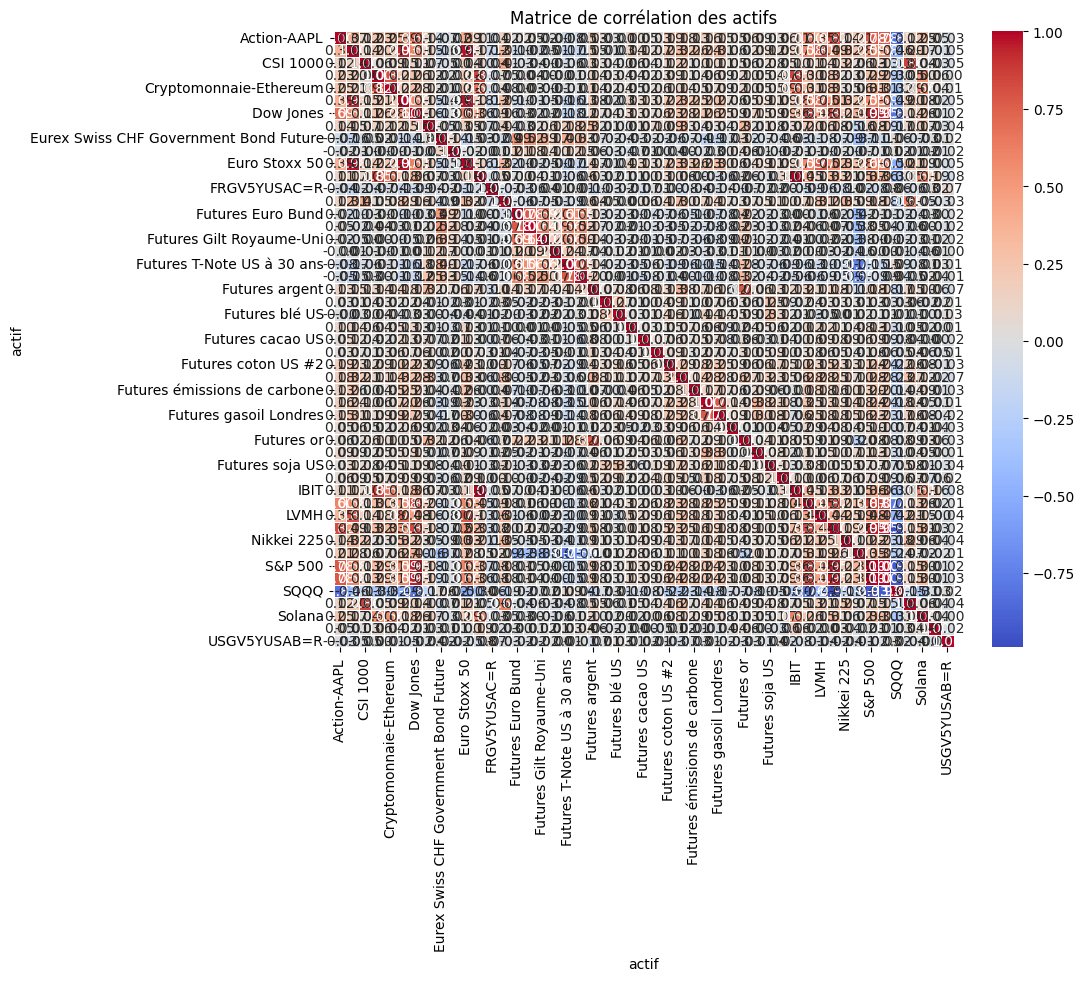

In [ ]:
def plot_correlation_matrix(df):
    correlation_matrix = df.pivot_table(
        values="Variation", index="Date", columns="actif"
    ).corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
    )
    plt.title("Matrice de corrélation des actifs")
    plt.show()

plot_correlation_matrix(df)


Cette fonction calcule et affiche le range journalier moyen pour chaque actif, regroupé par année. Le range journalier correspond à la différence entre le plus haut et le plus bas de la journée pour chaque actif.

L'affichage sous forme de graphique à barres permet de visualiser l'évolution de cette volatilité quotidienne au fil des années pour chaque actif. Cela peut être utile pour évaluer la variation du risque d'un actif sur une période donnée, afin d'adapter les stratégies d'investissement ou de gestion de portefeuille.

In [ ]:
def plot_daily_range(df):
    df["Année"] = df["Date"].dt.year

    # Moyenne annuelle du range journalier
    range_data = df.groupby(["Année", "actif"])["range_journalier"].mean().reset_index()

    # Graphique
    fig = px.bar(
        range_data,
        x="Année",
        y="range_journalier",
        color="actif",
        title="Range journalier moyen par année et actif",
        labels={"range_journalier": "Range Journalier Moyen", "Année": "Année", "actif": "Actif"}
    )
    fig.show()
plot_daily_range(df)


# Performance (top 5/ flop 5)

Dans cette section, nous allons analyser les performances des actifs en mettant en avant les cinq meilleurs (Top 5) et les cinq moins performants (Flop 5) en termes de variation ou de rendement. Cette analyse permet d'identifier les actifs qui ont généré les meilleures et les pires performances sur une période donnée, afin d'orienter les décisions d'investissement.

La fonction `display_top_flop_ranking` permet d'afficher les classements des actifs en fonction de différentes métriques de performance. Elle calcule :

1. **Performance cumulée** : la somme des variations de chaque actif, pour identifier les actifs les plus performants et les moins performants.
2. **Volatilité** : la volatilité moyenne sur 10 jours de chaque actif, afin de mettre en évidence les actifs les moins volatils (stables) et les plus volatils.
3. **Variation moyenne annuelle** : la variation totale par année, calculée pour chaque actif, afin d'analyser les meilleurs et les pires actifs en termes de variation annuelle.

Cette analyse permet d'obtenir une vue d'ensemble des actifs les plus intéressants à surveiller, en fonction de leur performance, stabilité et variation sur l'année.

In [ ]:
def display_top_flop_ranking(df):
    """
    Affiche les classements des meilleurs et des pires actifs basés sur plusieurs métriques.
    Args:
        df (pd.DataFrame): Le DataFrame contenant les colonnes nécessaires.
    """
    # Calculer les métriques par actif
    performance = df.groupby('actif')['Variation'].sum().sort_values(ascending=False)
    volatilité = df.groupby('actif')['volatilité_10'].mean().sort_values(ascending=True)
    variation_annuelle = (
        df.groupby(['actif', df['Date'].dt.year])['Variation'].sum().groupby('actif').mean()
    ).sort_values(ascending=False)

    print("\n--- TOP 5 Actifs par Performance Cumulée ---")
    print(performance.head(5))
    print("\n--- FLOP 5 Actifs par Performance Cumulée ---")
    print(performance.tail(5))

    print("\n--- TOP 5 Actifs les Moins Volatils ---")
    print(volatilité.head(5))
    print("\n--- FLOP 5 Actifs les Plus Volatils ---")
    print(volatilité.tail(5))

    print("\n--- TOP 5 Actifs par Variation Moyenne Annuelle ---")
    print(variation_annuelle.head(5))
    print("\n--- FLOP 5 Actifs par Variation Moyenne Annuelle ---")
    print(variation_annuelle.tail(5))



display_top_flop_ranking(df)



--- TOP 5 Actifs par Performance Cumulée ---
actif
THCX                      152.8570
Solana                      9.2527
Cryptomonnaie-Ethereum      4.3149
USGV5YUSAB=R                4.1632
Cryptomonnaie-Bitcoin       3.5752
Name: Variation, dtype: float64

--- FLOP 5 Actifs par Performance Cumulée ---
actif
Futures Euro OAT              -0.1861
Futures T-Note US à 30 ans   -0.2156
Futures Gilt Royaume-Uni      -0.2390
Futures pétrole brut WTI     -2.7654
SQQQ                          -3.9893
Name: Variation, dtype: float64

--- TOP 5 Actifs les Moins Volatils ---
actif
Euribor c2 Futures     0.024200
Futures fioul          0.061427
Futures cuivre         0.062033
Futures gaz naturel    0.193287
Futures Japon JGB      0.234761
Name: volatilité_10, dtype: float64

--- FLOP 5 Actifs les Plus Volatils ---
actif
NASDAQ Composite          186.292202
FTSE China 50             324.224879
Dow Jones                 365.381919
Nikkei 225                396.862929
Cryptomonnaie-Bitcoin    105

La fonction `display_top_flop_ranking` affiche les meilleurs et les pires actifs en fonction de leur performance annuelle, en termes d'évolution en pourcentage. Elle calcule d'abord l'évolution annuelle de chaque actif, en comparant le prix de début et de fin d'année. Ensuite, en fonction de l'année et du nombre d'actifs souhaité (TOP ou FLOP), elle affiche les actifs avec la plus grande augmentation et les plus fortes baisses de prix.

L'intérêt de ce code est de fournir une analyse visuelle interactive qui permet aux utilisateurs de sélectionner une année et de voir facilement les performances des actifs pour cette période. Grâce aux widgets interactifs, les utilisateurs peuvent ajuster le nombre d'actifs à afficher (TOP et FLOP), ce qui rend cette visualisation flexible et adaptée à des besoins spécifiques.

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntSlider

# Calculer l'évolution annuelle en pourcentage
def calculate_annual_percentage_change(df):
    df['Année'] = df['Date'].dt.year
    evolution_data = df.groupby(['Année', 'actif']).agg(
        Prix_debut=('Dernier', 'first'),
        Prix_fin=('Dernier', 'last')
    ).reset_index()

    # Calcul de l'évolution annuelle en pourcentage
    evolution_data['Évolution (%)'] = ((evolution_data['Prix_fin'] - evolution_data['Prix_debut']) /
                                       evolution_data['Prix_debut']) * 100
    return evolution_data

# Préparer les données
evolution_data = calculate_annual_percentage_change(df)

# Fonction pour afficher les top et flop actifs par année
def display_top_flop(year, top_n):
    # Filtrer les données pour l'année sélectionnée
    filtered_data = evolution_data[evolution_data['Année'] == year]

    # Trier les données par évolution
    sorted_data = filtered_data.sort_values(by='Évolution (%)', ascending=False)

    # Sélectionner les TOP et FLOP
    top_flop_data = pd.concat([sorted_data.head(top_n), sorted_data.tail(top_n)])
    top_flop_data['Type'] = ['TOP'] * top_n + ['FLOP'] * top_n

    # Créer un graphique interactif
    fig = px.bar(
        top_flop_data,
        x='actif',
        y='Évolution (%)',
        color='Type',
        text='Évolution (%)',
        title=f"Top {top_n} et Flop {top_n} des actifs par évolution annuelle (%) en {year}",
        barmode='group'
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(yaxis_title='Évolution (%)', xaxis_title='Actif', showlegend=True)
    fig.show()

# Widgets interactifs
year_slider = IntSlider(
    value=df['Date'].dt.year.min(),
    min=df['Date'].dt.year.min(),
    max=df['Date'].dt.year.max(),
    step=1,
    description='Année:',
    continuous_update=False
)
top_n_slider = IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Top/Flop:',
    continuous_update=False
)

# Lancer l'interface interactive
interact(display_top_flop, year=year_slider, top_n=top_n_slider)


interactive(children=(IntSlider(value=2018, continuous_update=False, description='Année:', max=2024, min=2018)…

<function __main__.display_top_flop(year, top_n)>

Ce code permet de créer une application Dash interactive pour afficher les classements des meilleurs (TOP) et des pires (FLOP) actifs en fonction de différentes métriques, comme la performance cumulée, la volatilité moyenne, et la variation annuelle moyenne.

Il commence par préparer les données nécessaires en calculant ces métriques pour chaque actif. Ensuite, il utilise Dash pour créer une interface avec un menu déroulant permettant de choisir la métrique à afficher, ainsi qu'un champ de saisie pour déterminer le nombre d'actifs à afficher dans les classements TOP et FLOP. L'utilisateur peut ainsi interagir avec l'application et visualiser les performances des actifs en fonction de la métrique choisie.

L'intérêt de ce code réside dans la possibilité d'explorer facilement et visuellement la performance des actifs selon plusieurs critères, tout en offrant une flexibilité d'affichage en fonction des préférences de l'utilisateur (nombre d'actifs à afficher).

In [ ]:

# Préparer vos données
def prepare_data(df):
    performance = df.groupby('actif')['Variation'].sum().reset_index(name='Performance Cumulée')
    volatilité = df.groupby('actif')['volatilité_10'].mean().reset_index(name='Volatilité Moyenne')
    variation_annuelle = (
        df.groupby(['actif', df['Date'].dt.year])['Variation']
        .sum()
        .groupby('actif')
        .mean()
        .reset_index(name='Variation Moyenne Annuelle')
    )
    return {
        'Performance Cumulée': performance,
        'Volatilité Moyenne': volatilité,
        'Variation Moyenne Annuelle': variation_annuelle,
    }

# Initialisation de Dash
app = dash.Dash(__name__)

# Préparer le dataset (remplacez `df` par votre DataFrame)
data = prepare_data(df)

# Disposition de l'application
app.layout = html.Div([
    html.H1("Classement des Actifs : TOP & FLOP", style={'textAlign': 'center'}),

    html.Label("Choisissez une métrique :"),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': key, 'value': key} for key in data.keys()],
        value='Performance Cumulée',
        style={'width': '50%'}
    ),

    html.Label("Nombre d'actifs à afficher (TOP & FLOP) :"),
    dcc.Input(id='top-n-input', type='number', value=5, min=1, step=1, style={'width': '20%'}),

    dcc.Graph(id='top-flop-graph')
])

# Callback pour mettre à jour le graphique
@app.callback(
    Output('top-flop-graph', 'figure'),
    [Input('metric-dropdown', 'value'),
     Input('top-n-input', 'value')]
)
def update_graph(selected_metric, top_n):
    # Récupérer les données de la métrique sélectionnée
    metric_data = data[selected_metric]
    sorted_data = metric_data.sort_values(by=metric_data.columns[1], ascending=False)

    # Sélectionner TOP et FLOP
    top_flop = pd.concat([sorted_data.head(top_n), sorted_data.tail(top_n)])

    # Créer le graphique
    fig = px.bar(
        top_flop,
        x='actif',
        y=metric_data.columns[1],
        color='actif',
        title=f"TOP {top_n} et FLOP {top_n} pour {selected_metric}",
        text_auto='.2f'
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Ce code permet de préparer et d'afficher un graphique interactif pour visualiser les meilleurs (TOP) et les pires (FLOP) actifs en fonction de différentes métriques moyennes annuelles, telles que les prix, les variations, les volumes, la moyenne mobile, et la volatilité.

Le processus commence par la préparation des données annuelles groupées par actif, où les moyennes annuelles pour chaque métrique sont calculées. Ensuite, un graphique interactif est généré via la bibliothèque Plotly, permettant à l'utilisateur de choisir la métrique, l'année et le nombre d'actifs à afficher.

L'interface inclut des widgets interactifs comme un menu déroulant pour sélectionner la métrique, un curseur pour choisir l'année, et un autre pour déterminer combien d'actifs afficher. Ce système offre une vue dynamique des performances des actifs sur plusieurs critères, avec un accès facile aux TOP et FLOP pour chaque métrique.

In [ ]:
# Préparer les données groupées annuelles
def prepare_annual_data(df):
    df['Année'] = df['Date'].dt.year
    grouped_data = {}
    for column in ['Dernier', 'Variation', 'Vol.', 'moyenne_mobile_10', 'volatilité_10']:
        if column in df.columns:
            grouped = df.groupby(['Année', 'actif'])[column].mean().reset_index()
            grouped.rename(columns={column: 'Valeur Moyenne'}, inplace=True)
            grouped['Colonne'] = column
            grouped_data[column] = grouped
    return grouped_data

# Préparer les données
annual_data = prepare_annual_data(df)

# Fonction pour afficher le graphique
def plot_top_flop(data_column, year, top_n):
    # Filtrer les données pour l'année et la colonne sélectionnées
    data = annual_data[data_column]
    filtered_data = data[data['Année'] == year]

    # Trier par valeur moyenne et sélectionner TOP & FLOP
    sorted_data = filtered_data.sort_values(by='Valeur Moyenne', ascending=False)
    top_flop_data = pd.concat([sorted_data.head(top_n), sorted_data.tail(top_n)])

    # Créer un graphique interactif
    fig = px.bar(
        top_flop_data,
        x='actif',
        y='Valeur Moyenne',
        color='actif',
        text='Valeur Moyenne',
        title=f"TOP {top_n} et FLOP {top_n} pour '{data_column}' en {year}",
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(yaxis_title='Valeur Moyenne', xaxis_title='Actif', showlegend=False)
    fig.show()

# Widgets interactifs
dropdown = Dropdown(
    options=list(annual_data.keys()),
    description='Colonne:',
    value='Variation'
)
year_slider = IntSlider(
    value=df['Date'].dt.year.min(),
    min=df['Date'].dt.year.min(),
    max=df['Date'].dt.year.max(),
    step=1,
    description='Année:',
    continuous_update=False
)
top_n_slider = IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Top/Flop:',
    continuous_update=False
)

# Lancer l'interface interactive
interact(plot_top_flop, data_column=dropdown, year=year_slider, top_n=top_n_slider)


interactive(children=(Dropdown(description='Colonne:', index=1, options=('Dernier', 'Variation', 'Vol.', 'moye…

<function __main__.plot_top_flop(data_column, year, top_n)>

# Conclusion

Ce projet d'analyse des données financières a permis de développer une compréhension approfondie de l'évolution des actifs financiers à travers divers indicateurs, tels que la performance cumulée, la volatilité, les variations annuelles, et les moyennes mobiles. En combinant des outils de traitement des données et des visualisations interactives, nous avons pu explorer des tendances, identifier des anomalies, et extraire des informations utiles pour la prise de décision.

L'un des principaux enseignements tirés de ce projet réside dans l'importance de la visualisation des données pour rendre les analyses financières plus accessibles et compréhensibles. L'utilisation de graphiques interactifs a permis d'explorer de manière plus intuitive les relations entre les différentes métriques et leurs évolutions dans le temps. De plus, les classements TOP et FLOP ont apporté une dimension supplémentaire à l'analyse, facilitant l'identification des actifs les plus performants et les moins performants selon des critères spécifiques.

L'intérêt de ce projet va au-delà de l'acquisition de compétences techniques dans l'analyse et la visualisation de données : il nous a permis de mieux comprendre les comportements des actifs financiers, d’identifier des patterns utiles et de fournir des insights exploitables. Pour les décideurs, ce type d'analyse est crucial pour prendre des décisions éclairées en matière d'investissement et de gestion de portefeuille, en leur offrant des outils pour suivre les performances des actifs sur le long terme.